In [22]:
import pandas as pd
import matplotlib.pyplot as plt


# Data
dataset_path = "https://raw.githubusercontent.com/fivethirtyeight/data/master/urbanization-index/urbanization-census-tract.csv"

In [23]:
def load_dataset(dataset):
    """loads the data"""
    df = pd.read_csv(dataset)
    return df


# Summary Statistics
def calculate_summaries(
    data,
    column_one,
    column_one_heading,
    column_two,
    column_two_heading,
    set_first_column_index=False,
) -> pd.DataFrame:
    """Generates the statistics"""
    stats_list = []
    stats_list.append(["Count", data[column_one].count(), data[column_two].count()])
    stats_list.append(["Mean", data[column_one].mean(), data[column_two].mean()])
    stats_list.append(["Median", data[column_one].median(), data[column_two].median()])
    stats_list.append(["Max", data[column_one].max(), data[column_two].max()])
    stats_list.append(["Min", data[column_one].min(), data[column_two].min()])
    stats_list.append(
        ["Standard Deviation", data[column_one].std(), data[column_two].std()]
    )

    stats_df = pd.DataFrame(stats_list)

    stats_df.rename(
        columns={0: "Statistic", 1: column_one_heading, 2: column_two_heading},
        inplace=True,
    )
    # Necessary if we want to reference a row by the statistic's name
    if set_first_column_index:
        stats_df.set_index("Statistic", inplace=True)

    return stats_df


# Data Visualization
def create_bar_chart(
    data: pd.DataFrame, title, xLabel, yLabel, save_chart: bool, save_path=""
):
    data.plot(kind="bar")
    plt.title(title)
    plt.xlabel(xLabel)
    plt.ylabel(yLabel)
    plt.legend(title="States")
    if save_chart:
        plt.tight_layout()
        plt.savefig(save_path)
    else:
        plt.show()


def create_histogram(data, column, title, yLabel, save_chart: bool, save_path=""):
    plt.hist(data[column], edgecolor="gray", bins=200)
    plt.title(title)
    plt.xlabel(column.capitalize())
    plt.ylabel(yLabel)
    if save_chart:
        plt.savefig(save_path)
    else:
        plt.show()


In [24]:
dataset = load_dataset(dataset_path)
assert dataset is not None
assert dataset.shape == (73280, 8)
dataset.tail()

,statefips,state,gisjoin,lat_tract,long_tract,population,adj_radiuspop_5,urbanindex
73275,72,Puerto Rico,G7201530750501,18.03124,-66.86725,6011,52155.0,10.86198
73276,72,Puerto Rico,G7201530750502,18.02477,-66.86044,2342,55257.0,10.91975
73277,72,Puerto Rico,G7201530750503,18.02527,-66.87763,2218,48423.0,10.78773
73278,72,Puerto Rico,G7201530750601,18.01738,-66.83936,4380,50600.0,10.83171
73279,72,Puerto Rico,G7201530750602,17.98674,-66.85192,3001,44921.0,10.71266


In [25]:
my_calculated_summaries = calculate_summaries(
    dataset, "population", "Population", "urbanindex", "Urban Index", True
)
pandas_summaries = dataset.describe()
assert (
    pandas_summaries.loc["mean", "population"]
    == my_calculated_summaries.loc["Mean", "Population"]
)
assert (
    pandas_summaries.loc["std", "population"]
    == my_calculated_summaries.loc["Standard Deviation", "Population"]
)
assert (
    pandas_summaries.loc["min", "population"]
    == my_calculated_summaries.loc["Min", "Population"]
)
assert (
    pandas_summaries.loc["max", "population"]
    == my_calculated_summaries.loc["Max", "Population"]
)
# Not setting first column as an index for better visual effect
calculate_summaries(dataset, "population", "Population", "urbanindex", "Urban Index")

,Statistic,Population,Urban Index
0,Count,73280.000000,73280.000000
1,Mean,4426.168927,11.041972
2,Median,4126.000000,11.616885
3,Max,65528.000000,14.997230
4,Min,2.000000,-0.297768
5,Standard Deviation,2198.083466,2.081913


# Population Bar Chart

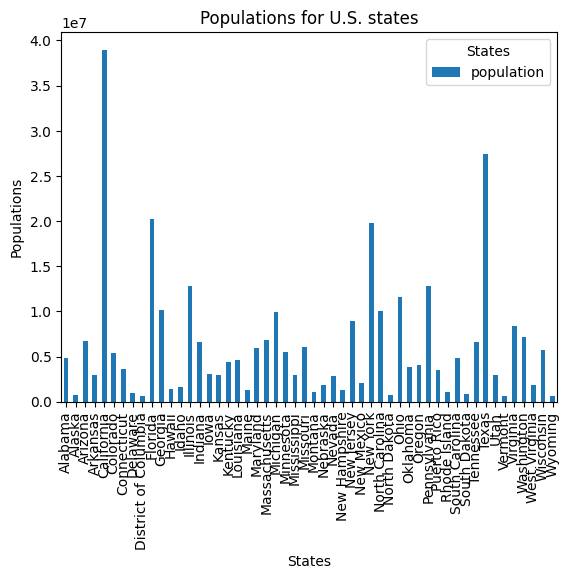

In [26]:
population_sums = dataset.groupby(["state"])["population"].sum()
create_bar_chart(
    population_sums, "Populations for U.S. states", "States", "Populations", False
)

# Population Histogram

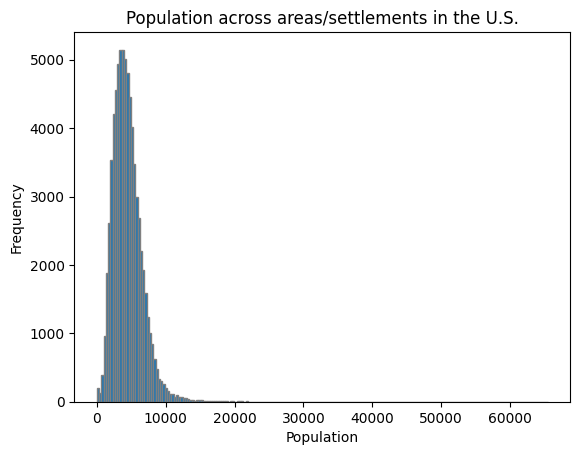

In [27]:
create_histogram(
    dataset,
    "population",
    "Population across areas/settlements in the U.S.",
    "Frequency",
    False,
)